# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [3]:
from unityagents import UnityEnvironment
import numpy as np
import torch as T
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from maddpg3 import MADDPG

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
states = env_info.vector_observations
state_dim = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

action_dim = brain.vector_action_space_size
print('Size of each action:', action_size)

random_seed = 100
print('Random Seed:', action_size)


There are 2 agents. Each observes a state with length: 24
Size of each action: 2
Random Seed: 2


In [9]:
agents = MADDPG(num_agents, state_dim, action_dim, random_seed)


In [10]:
def train():
    scores_deque = deque(maxlen=100)
    scores = []
    for x in range(1, 1000+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agents.reset()
        scores_episode = np.zeros(num_agents)
        
        while True:
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agents.step(states, actions, rewards, next_states, dones)
            scores_episode += rewards
            states = next_states
            
            if np.any(dones):
                break
        score = np.max(scores_episode)
        scores_deque.append(score)
        scores.append(score)
        
        print(f'Episode: {x} \tAverage Score {np.mean(scores_deque):.4f} \tCurrent Score: {score:.4f}')
        
        if x % 100 == 0:
            print(f'Episode: {x} \tAverage Score {np.mean(scores_deque):.4f} \tCurrent Score: {score:.4f}')
            agents.saveCheckPoints(False)
            
        if np.mean(scores_deque) >= 0.5:
            agents.saveCheckPoints(True)
            break
    return scores
            

In [29]:
scores = train()

Episode: 1 	Average Score 0.2000 	Current Score: 0.2000
Episode: 2 	Average Score 0.1500 	Current Score: 0.1000
Episode: 3 	Average Score 0.1333 	Current Score: 0.1000
Episode: 4 	Average Score 0.1000 	Current Score: 0.0000
Episode: 5 	Average Score 0.0800 	Current Score: 0.0000
Episode: 6 	Average Score 0.0833 	Current Score: 0.1000
Episode: 7 	Average Score 0.0714 	Current Score: 0.0000
Episode: 8 	Average Score 0.0738 	Current Score: 0.0900
Episode: 9 	Average Score 0.0656 	Current Score: 0.0000
Episode: 10 	Average Score 0.0690 	Current Score: 0.1000
Episode: 11 	Average Score 0.0709 	Current Score: 0.0900
Episode: 12 	Average Score 0.0725 	Current Score: 0.0900
Episode: 13 	Average Score 0.0738 	Current Score: 0.0900
Episode: 14 	Average Score 0.0750 	Current Score: 0.0900
Episode: 15 	Average Score 0.0760 	Current Score: 0.0900
Episode: 16 	Average Score 0.0775 	Current Score: 0.1000
Episode: 17 	Average Score 0.0729 	Current Score: 0.0000
Episode: 18 	Average Score 0.0739 	Curre

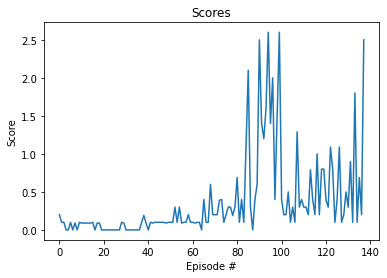

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Scores")
plt.show()

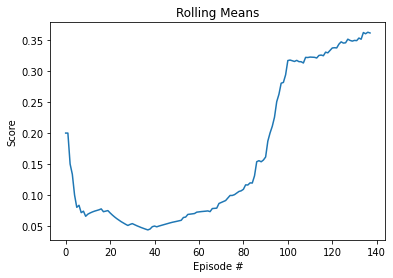

In [33]:
# plot the scores
test = [scores[0]]
for t in range(1,len(scores)):
    test.append(sum(scores[:t])/t)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), test)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Rolling Means")
plt.show()

In [34]:
agents = MADDPG(num_agents, state_dim, action_dim, random_seed)
agents.loadCheckPoints(isFinal=True)

In [35]:
scores = []

def play():
    for x in range(0, 100):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores_episode = np.zeros(num_agents)
        
        while True:
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            scores_episode += rewards
            states = next_states
            
            if np.any(dones):
                break
        
        score = np.max(scores_episode)
        scores.append(score)
        print(f'Episode: {x} \tAverage Score {np.mean(scores):.4f} \tCurrent Score: {score:.4f}')
    
    return scores
        
        

In [ ]:
scores = play()

Episode: 0 	Average Score 1.3000 	Current Score: 1.3000
Episode: 1 	Average Score 1.5000 	Current Score: 1.7000
Episode: 2 	Average Score 1.7333 	Current Score: 2.2000
Episode: 3 	Average Score 1.3500 	Current Score: 0.2000
Episode: 4 	Average Score 1.1200 	Current Score: 0.2000
Episode: 5 	Average Score 1.2500 	Current Score: 1.9000
Episode: 6 	Average Score 1.1271 	Current Score: 0.3900
Episode: 7 	Average Score 0.9988 	Current Score: 0.1000
Episode: 8 	Average Score 1.0989 	Current Score: 1.9000
Episode: 9 	Average Score 1.1490 	Current Score: 1.6000
Episode: 10 	Average Score 1.0536 	Current Score: 0.1000
Episode: 11 	Average Score 0.9825 	Current Score: 0.2000
Episode: 12 	Average Score 0.9762 	Current Score: 0.9000
Episode: 13 	Average Score 0.9207 	Current Score: 0.2000
Episode: 14 	Average Score 0.8660 	Current Score: 0.1000
Episode: 15 	Average Score 0.8181 	Current Score: 0.1000
Episode: 16 	Average Score 0.9229 	Current Score: 2.6000
Episode: 17 	Average Score 1.0161 	Curren

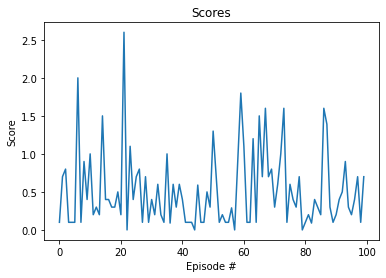

In [27]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Scores")
plt.show()

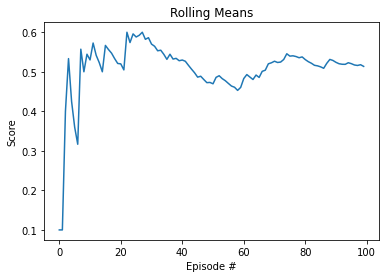

In [28]:
# plot the scores
test = [scores[0]]
for t in range(1,len(scores)):
    test.append(sum(scores[:t])/t)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), test)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Rolling Means")
plt.show()

In [17]:
env.close()